In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# import tensorflow as tf
# tf.test.gpu_device_name()

In [3]:
# import tensorflow as tf
# tf.test.gpu_device_name()

In [4]:
IMAGE_SIZE = 216

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Activation, MaxPooling2D

In [6]:
# import pathlib
# dataset_url = "https://storage.googleapis.com/wandb_datasets/nature_12K.zip"
# data_dir = tf.keras.utils.get_file('dataset', origin=dataset_url, untar=True)
# data_dir = pathlib.Path(data_dir)

In [7]:
Dataset_Path = os.getcwd() + '/inaturalist_12K'
labels = ["Amphibia","Animalia","Arachnida","Aves","Fungi","Insecta","Mammalia","Mollusca","Plantae","Reptilia"]
DATSET_SIZE = 10000

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import cv2
import csv
import PIL


# Dataset_Path = '/content/drive/MyDrive/inaturalist_12K'
train_path = os.path.join(Dataset_Path , 'train')
test_path = os.path.join(Dataset_Path , 'val')
# test_path1 = test_path
test_path1 = 'D:/val'

In [9]:
import pathlib
Dataset_Path = pathlib.Path(Dataset_Path)
train_path = pathlib.Path(train_path)
test_path = pathlib.Path(test_path)

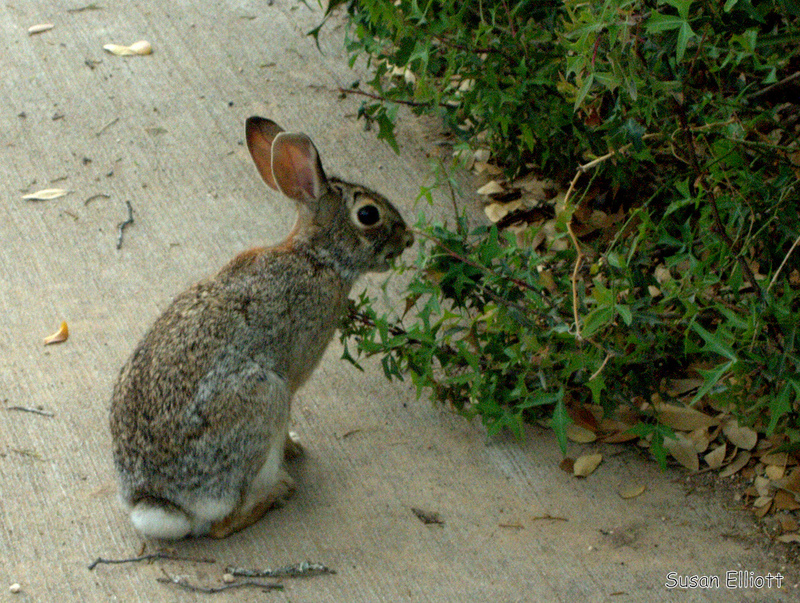

In [10]:
Mammals = list(train_path.glob('Mammalia/*'))
PIL.Image.open(str(Mammals[0]))

# Preprocessing

In [11]:
batch_size = 128

In [12]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path, 
    class_names=None, 
    color_mode='rgb', 
    batch_size=batch_size, 
    image_size=(IMAGE_SIZE,IMAGE_SIZE), 
    shuffle=True, 
    seed=1234, 
    validation_split=0.1,
    subset="training",
    interpolation='bilinear'
)

Found 9999 files belonging to 10 classes.
Using 9000 files for training.


In [13]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path, 
    class_names=None, 
    color_mode='rgb', 
    batch_size=batch_size, 
    image_size=(IMAGE_SIZE,IMAGE_SIZE), 
    shuffle=True, 
    seed=1234, 
    validation_split=0.1,
    subset="validation",
    interpolation='bilinear'
)

Found 9999 files belonging to 10 classes.
Using 999 files for validation.


In [14]:
type(train_ds)
type(val_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [15]:
class_names = train_ds.class_names
print(class_names)

['Amphibia', 'Animalia', 'Arachnida', 'Aves', 'Fungi', 'Insecta', 'Mammalia', 'Mollusca', 'Plantae', 'Reptilia']


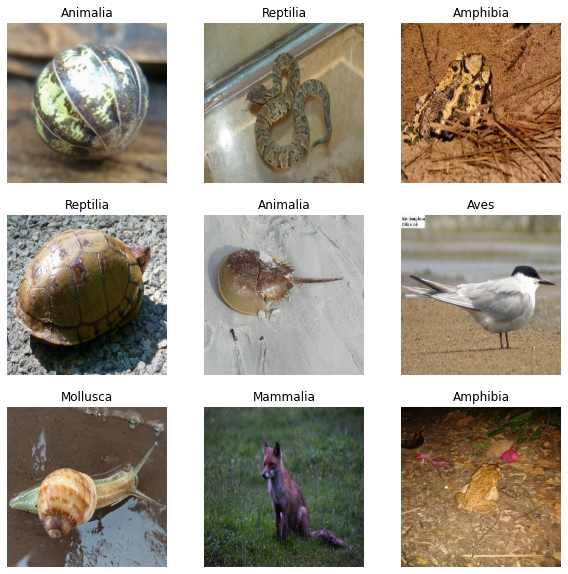

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [17]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [18]:
from keras.layers import experimental

In [19]:
class ConvNet:
    def __init__(self, numFilters, filterSize, filterConf = 'same'):
        return

    def initModel(self, numFilters, filterSize, filterConf = 'same'):
        model = Sequential()
        input_shape1 = (IMAGE_SIZE, IMAGE_SIZE, 3)
        model.add(experimental.preprocessing.Rescaling(1./255, input_shape=input_shape1))
        model.add(Conv2D(numFilters, (filterSize, filterSize), input_shape=input_shape1))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))        
        
        for l in range(4):
            model.add(Conv2D(numFilters, (filterSize, filterSize)))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))
        
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dense(10, activation='softmax'))
        
        return model

In [20]:
network = ConvNet(32, 3)
model = network.initModel(32, 3)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 216, 216, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 214, 214, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 214, 214, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 107, 107, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 105, 105, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 105, 105, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 52, 52, 32)        0

In [21]:
# def loadImages():
#     trainfiles = []
#     trainclasses = []
#     classcounts = [0 for i in range(10)]
#     testfiles = []
#     testclasses = []
#     for subdir , dirs , files in os.walk(train_path):
#         for file in files:
#             if file.endswith(".jpg"):
#                 trainfiles.append(os.path.join(subdir,file))
#                 c = str(subdir).split(os.sep)[-1]
#                 for i in range(10):
#                     if labels[i] == c:
#                         trainclasses.append(i)
#                         classcounts[i]+=1
#                         break
#     for subdir , dirs , files in os.walk(test_path):
#         for file in files:
#             if file.endswith(".jpg"):
#                 testfiles.append(os.path.join(subdir,file))
#                 c = str(subdir).split(os.sep)[-1]
#                 for i in range(10):
#                     if labels[i] == c:
#                         testclasses.append(i)
#     return trainfiles , trainclasses , testfiles , testclasses , classcounts

# def preprocess(data, height, width):
#     dim = (width, height)
#     resdata = []
#     for i in range(len(data[:DATSET_SIZE])):
#         try:
#             img = cv2.imread(data[i],cv2.IMREAD_UNCHANGED)
#             res = cv2.resize(img, dim , interpolation=cv2.INTER_LINEAR)
#             #if image is greyscale, convert it to rgb
#             if(len(res.shape) != 3):
#                 res = cv2.cvtColor(res,cv2.COLOR_GRAY2RGB)
#             res = res/255.0
#             resdata.append(np.asarray(res))
#         except Exception as e:
#             print(data[i])
#             print(str(e))
#     return resdata

# def dataset(width,height):
#     trainfiles , trainclasses , testfiles , testclasses, classcounts = loadImages()
#     train_data = preprocess(trainfiles, height,width)
#     test_data = preprocess(testfiles, height,width)
#     # train_input = []
#     # val_input = []
#     # train_output = []
#     # val_output = []
#     # test_output = []
#     # test_input = []
#     train_output = np.eye(10)[trainclasses]
#     test_output = np.eye(10)[testclasses]
    
#     L = len(train_data)
#     return {
#         'Xtrain' : np.array(train_data), 
#         'Ytrain' : np.array(train_output),
#         # 'Xval' : np.array(val_input),
#         # 'Yval' : np.array(val_output),
#         'Xtest' :np.array(test_data),
#         'Ytest' :np.array(test_output)
#     }

# def flat(X):
#     X_f = []
#     for x in X:
#         X_f.append(x.flatten())
#     return X_f

# def savedata(d): 
#     with open('train_data.txt','w') as f:
#         csvwriter = csv.writer(f)
#         csvwriter.writerows(flat(d['Xtrain']))
        
# # d = dataset(256,256)
# # # print(d['Xtrain'])

# network = ConvNet(32, 3)
# model = network.initModel(32, 3)
# model.summary()

In [22]:
# ds = dataset(IMAGE_SIZE, IMAGE_SIZE)
# train_images = ds['Xtrain']
# train_labels = ds['Ytrain']

# test_images = ds['Xtest']
# test_labels = ds['Ytest']

In [23]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
# model.summary()

In [25]:
history = model.fit(train_ds,
          epochs=30,
          validation_data=val_ds,
          verbose=1)

Epoch 1/30
71/71 [==============================] - 55s 586ms/step - loss: 2.2848 - accuracy: 0.1228 - val_loss: 2.1758 - val_accuracy: 0.2032
Epoch 2/30
71/71 [==============================] - 6s 89ms/step - loss: 2.1565 - accuracy: 0.2089 - val_loss: 2.0749 - val_accuracy: 0.2442
Epoch 3/30
71/71 [==============================] - 6s 90ms/step - loss: 2.0689 - accuracy: 0.2464 - val_loss: 2.0198 - val_accuracy: 0.2733
Epoch 4/30
71/71 [==============================] - 5s 75ms/step - loss: 1.9985 - accuracy: 0.2843 - val_loss: 1.9775 - val_accuracy: 0.2933
Epoch 5/30
71/71 [==============================] - 6s 81ms/step - loss: 1.9360 - accuracy: 0.3111 - val_loss: 1.9563 - val_accuracy: 0.2963
Epoch 6/30
71/71 [==============================] - 5s 71ms/step - loss: 1.9032 - accuracy: 0.3289 - val_loss: 1.9322 - val_accuracy: 0.3063
Epoch 7/30
71/71 [==============================] - 5s 68ms/step - loss: 1.8611 - accuracy: 0.3454 - val_loss: 1.9438 - val_accuracy: 0.3023
Epoch 8/30


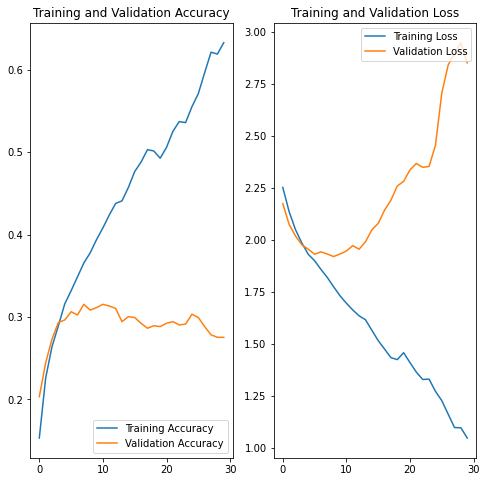

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = 30
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
img = tf.keras.preprocessing.image.load_img(
    test_path1, target_size=(IMAGE_SIZE, IMAGE_SIZE)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

PermissionError: [Errno 13] Permission denied: 'D:/val'

In [41]:
testfiles = []
testclasses = []
for subdir , dirs , files in os.walk(os.path.join(Dataset_Path,'val')):
        for file in files:
            if file.endswith(".jpg"):
                testfiles.append(os.path.join(subdir,file))
                c = str(subdir).split(os.sep)[-1]
                for i in range(10):
#                     print(classnames[i],c)
                    if class_names[i] == c:
                        testclasses.append(i)

test_images = []
for file in testfiles:
    img = PIL.Image.open(file)
    test_images.append(tf.keras.preprocessing.image.img_to_array( img.resize((IMAGE_SIZE,IMAGE_SIZE)) ) )

In [42]:
# print(test_images)
for img in test_images:
    img = img/255.0
# testclasses = np.eye(10)[testclasses]

In [43]:
# print(testclasses)
# print(test_images[0].shape)
test_images = np.array(test_images)

In [46]:
testclasses = np.array(testclasses)

In [48]:
loss, accuracy = model.evaluate(test_images, testclasses)

63/63 [==============================] - 0s 7ms/step - loss: 2.8429 - accuracy: 0.2990


In [29]:
# print(len(train_images))
# model.summary()
print(train_images)

NameError: name 'train_images' is not defined

## Wandb sweep

#### Install and login

In [ ]:
import wandb
from wandb.keras import WandbCallback

!wandb login

In [ ]:
def getModel(numFilters, filterSize, filterConf = 'same'):
    model = Sequential()
    input_shape1 = (IMAGE_SIZE, IMAGE_SIZE, 3)
    model.add(experimental.preprocessing.Rescaling(1./255, input_shape=input_shape1))
    model.add(Conv2D(numFilters, (filterSize, filterSize), input_shape=input_shape1))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))        

    for l in range(4):
        model.add(Conv2D(numFilters, (filterSize, filterSize)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

In [ ]:
run = wandb.init(project = 'DL-CNN',
                config = {
                    "learning_rate" : 0.005,
                    "epochs" : 20,
                    "batch_size" : 64,
                     "loss_function": "categorical_crossentropy",
                     "architecture": "CNN"
                })
config = wandb.config


tf.keras.backend.clear_session()
model = getModel(32, 3)
model.summary()

In [ ]:
# optimizer = tf.keras.optimizers.Adam(config.learning_rate) 
# model.compile(optimizer, config.loss_function, metrics=['acc'])

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

_ = model.fit(train_images, train_labels[:10000],
          batch_size=config.batch_size,
          epochs=config.epochs,
          validation_split=0.1,
          verbose=1,
         callbacks = [WandbCallback()])

In [ ]:
loss, accuracy = model.evaluate(test_images, test_labels)
print('Test Error Rate: ', round((1 - accuracy) * 100, 2))

# With wandb.log, we can easily pass in metrics as key-value pairs.
wandb.log({'Test Error Rate': round((1 - accuracy) * 100, 2)})

run.join()